In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
df = pd.read_csv(r'/content/education_level_region.csv')

In [39]:
df.describe()

,2018,2019,2020,2021,2022
count,45.000000,45.000000,45.000000,45.000000,45.0000
mean,33.333333,33.288889,33.355556,33.333333,33.4000
std,17.529196,18.037363,18.679298,19.840271,20.3139
min,6.000000,6.000000,6.000000,5.000000,5.0000
25%,13.000000,11.000000,11.000000,11.000000,10.0000
50%,36.000000,36.000000,35.000000,33.000000,32.0000
75%,47.000000,48.000000,49.000000,50.000000,53.0000
max,64.000000,65.000000,66.000000,68.000000,69.0000


# Mean Calculation

In [11]:
# Calculating Mean

# Filter the data for each state and calculate the mean for each education category
for state in df['Geography'].unique():
    state_data = df[df['Geography'] == state]

    # Calculate mean for each education category
    below_secondary_mean = state_data[state_data['Educational attainment level'] == 'Below upper secondary 7'].iloc[:, 2:].mean(numeric_only=True).mean()
    post_secondary_mean = state_data[state_data['Educational attainment level'] == 'Upper secondary and post-secondary non-tertiary'].iloc[:, 2:].mean(numeric_only=True).mean()
    tertiary_mean = state_data[state_data['Educational attainment level'] == 'Tertiary education'].iloc[:, 2:].mean(numeric_only=True).mean()

    # Print mean for each education category
    print(f"Mean for {state}:")
    print(f"Below Upper Secondary 7: {below_secondary_mean:.2f}%")
    print(f"Upper Secondary and Post-Secondary Non-Tertiary: {post_secondary_mean:.2f}%")
    print(f"Tertiary Education: {tertiary_mean:.2f}%")
    print()

Mean for Organisation for Economic Co-operation and Development (OECD) - average:
Below Upper Secondary 7: 20.60%
Upper Secondary and Post-Secondary Non-Tertiary: 41.00%
Tertiary Education: 39.00%

Mean for Canada 8:
Below Upper Secondary 7: 7.60%
Upper Secondary and Post-Secondary Non-Tertiary: 32.00%
Tertiary Education: 60.40%

Mean for Newfoundland and Labrador:
Below Upper Secondary 7: 11.00%
Upper Secondary and Post-Secondary Non-Tertiary: 36.20%
Tertiary Education: 52.80%

Mean for Prince Edward Island:
Below Upper Secondary 7: 8.80%
Upper Secondary and Post-Secondary Non-Tertiary: 31.80%
Tertiary Education: 59.40%

Mean for Nova Scotia:
Below Upper Secondary 7: 8.60%
Upper Secondary and Post-Secondary Non-Tertiary: 33.40%
Tertiary Education: 58.00%

Mean for New Brunswick:
Below Upper Secondary 7: 9.60%
Upper Secondary and Post-Secondary Non-Tertiary: 33.80%
Tertiary Education: 56.40%

Mean for Quebec:
Below Upper Secondary 7: 10.00%
Upper Secondary and Post-Secondary Non-Tertia

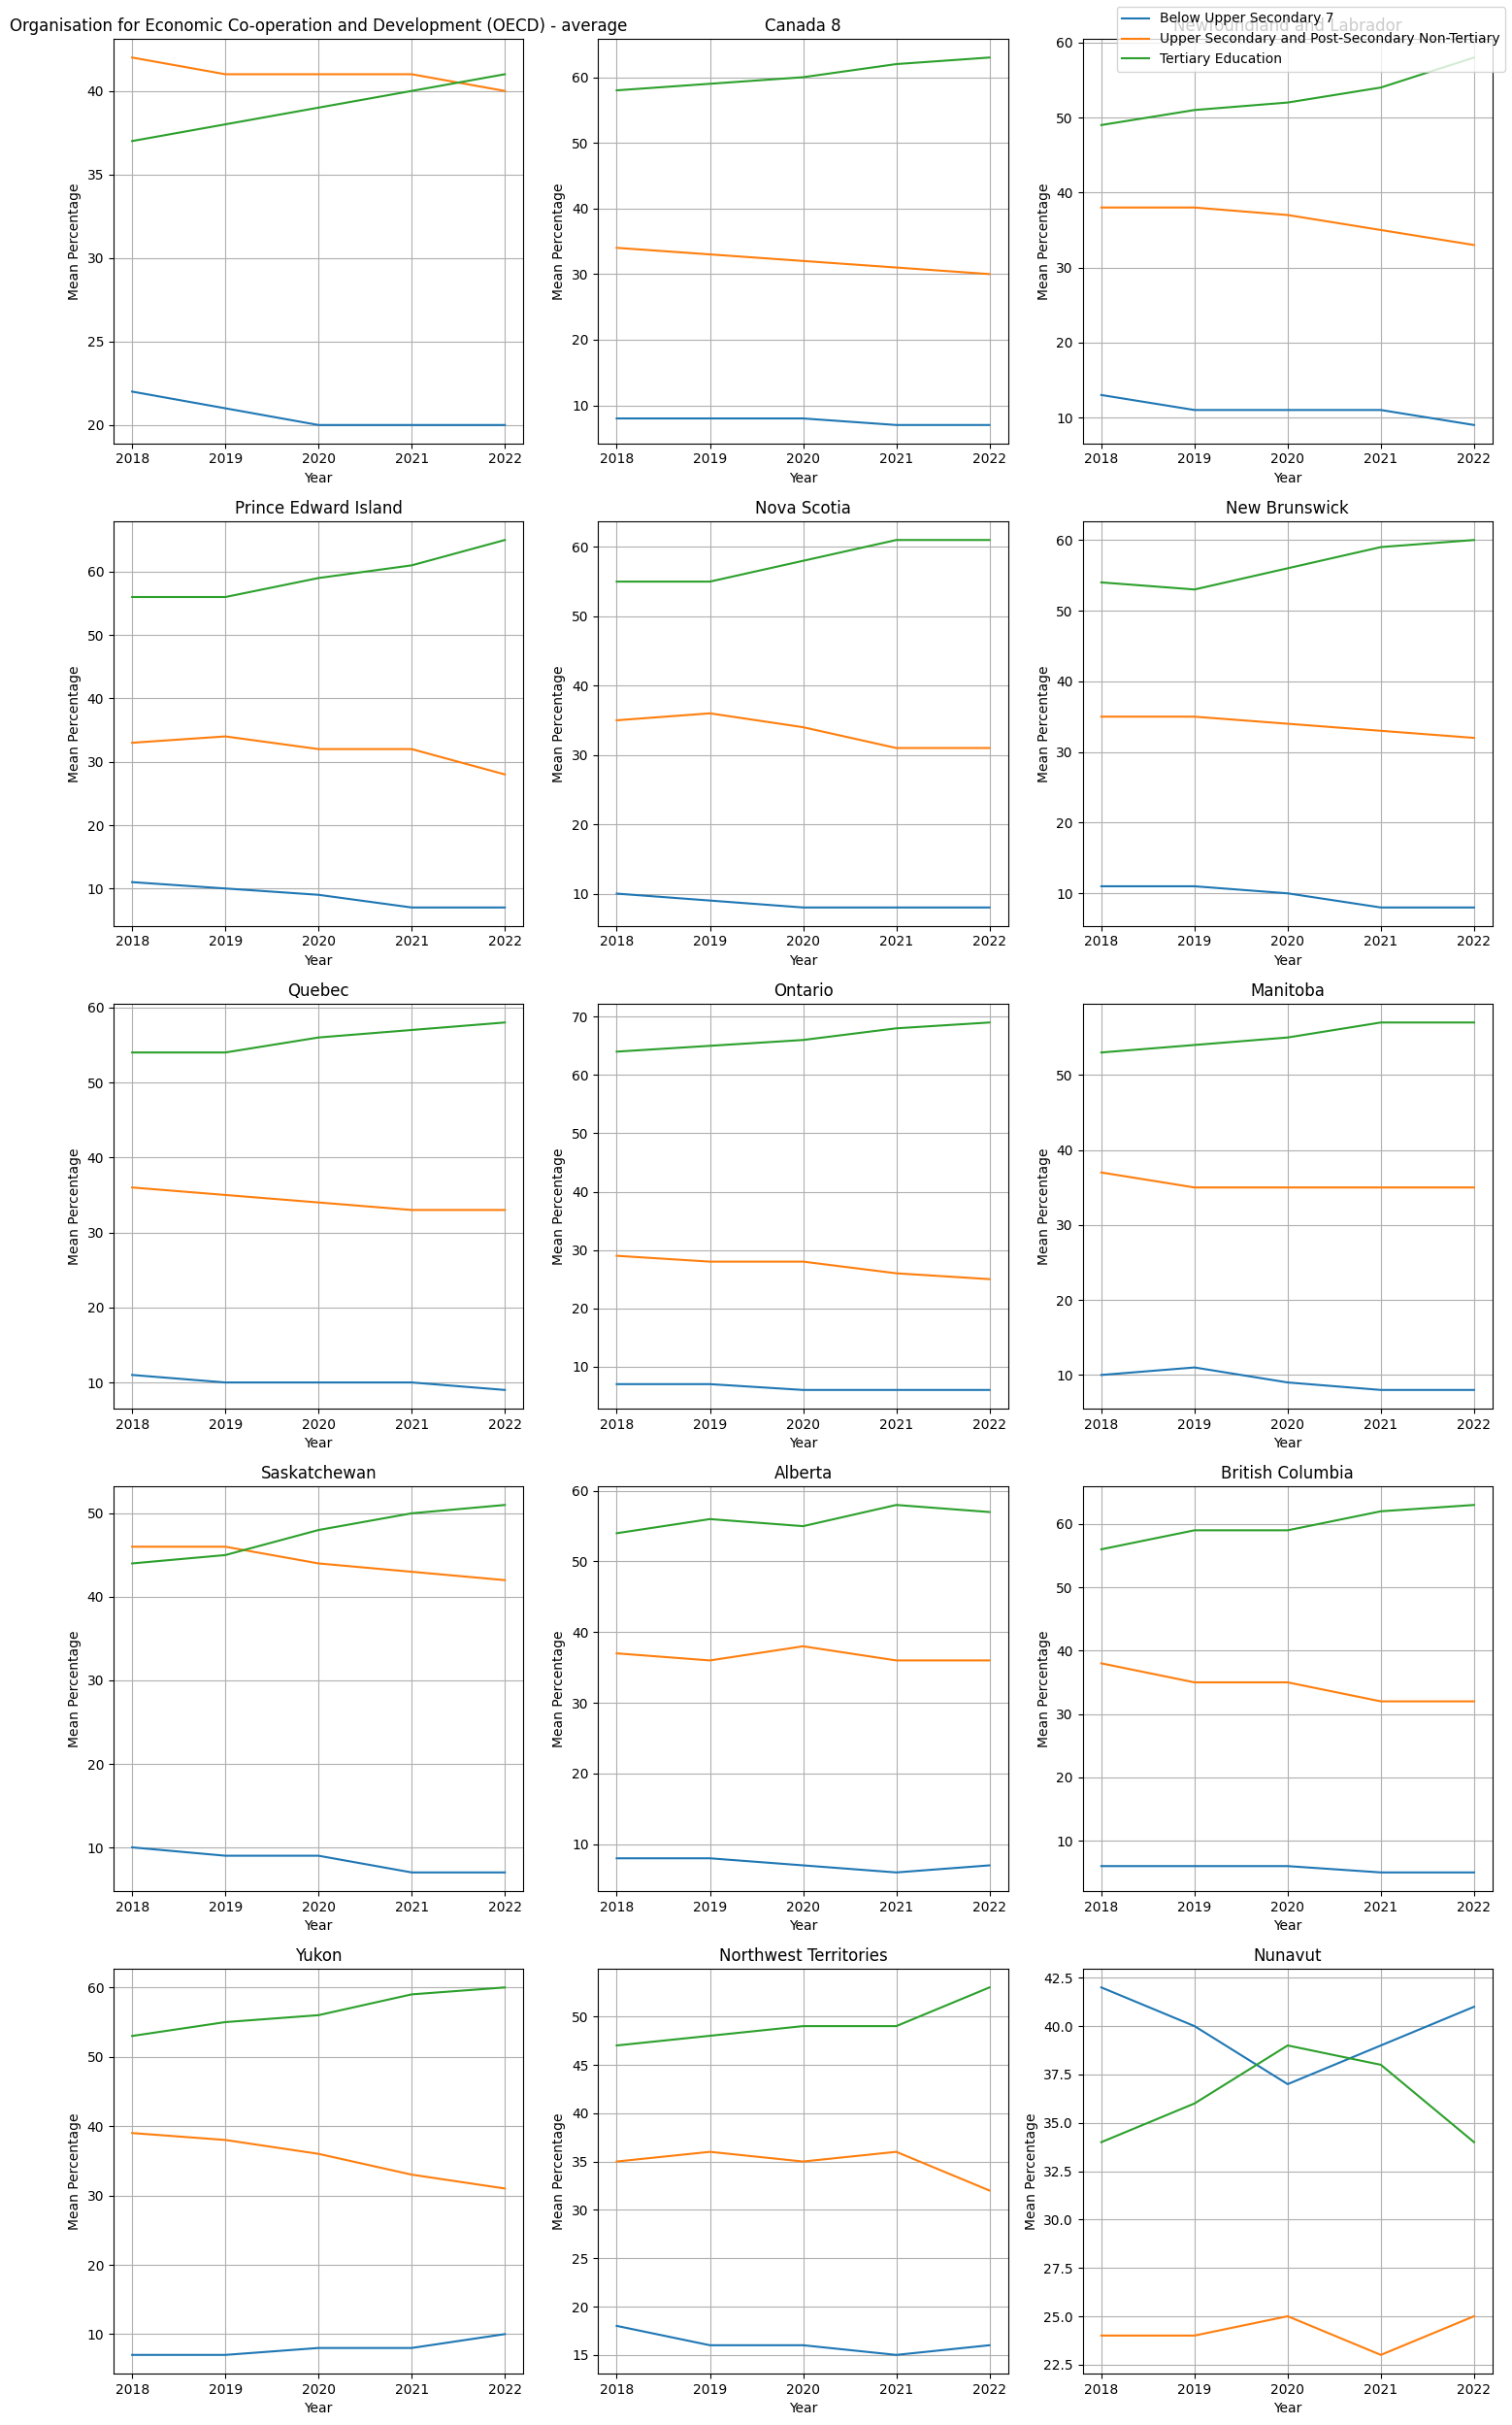

In [13]:
# Plotting Sub Plots for mean data

# Get unique states
states = df['Geography'].unique()

# Calculate the number of rows and columns for subplots
num_states = len(states)
num_cols = 3  # Define the number of columns
num_rows = -(-num_states // num_cols)  # Calculate the number of rows required

# Create a figure and axis object
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array to iterate over it easily
axs = axs.flatten()

# Initialize handles and labels for legend
handles, labels = None, None

# Filter the data for each state and plot mean data
for i, state in enumerate(states):
    state_data = df[df['Geography'] == state]

    # Calculate mean for each education category
    below_secondary_mean = state_data[state_data['Educational attainment level'] == 'Below upper secondary 7'].iloc[:, 2:].mean(numeric_only=True)
    post_secondary_mean = state_data[state_data['Educational attainment level'] == 'Upper secondary and post-secondary non-tertiary'].iloc[:, 2:].mean(numeric_only=True)
    tertiary_mean = state_data[state_data['Educational attainment level'] == 'Tertiary education'].iloc[:, 2:].mean(numeric_only=True)

    # Plot mean data on corresponding axis
    axs[i].plot(below_secondary_mean.index, below_secondary_mean.values, label='Below Upper Secondary 7')
    axs[i].plot(post_secondary_mean.index, post_secondary_mean.values, label='Upper Secondary and Post-Secondary Non-Tertiary')
    axs[i].plot(tertiary_mean.index, tertiary_mean.values, label='Tertiary Education')

    # Set title and labels
    axs[i].set_title(state)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Mean Percentage")
    axs[i].grid(True)

# Get handles and labels from the last subplot
handles, labels = axs[i].get_legend_handles_labels()

# Add a common legend outside of subplots
fig.legend(handles, labels, loc='upper right')

# Remove extra empty subplots
if num_states < num_rows * num_cols:
    for j in range(num_states, num_rows * num_cols):
        fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Region Wise Graph Plots

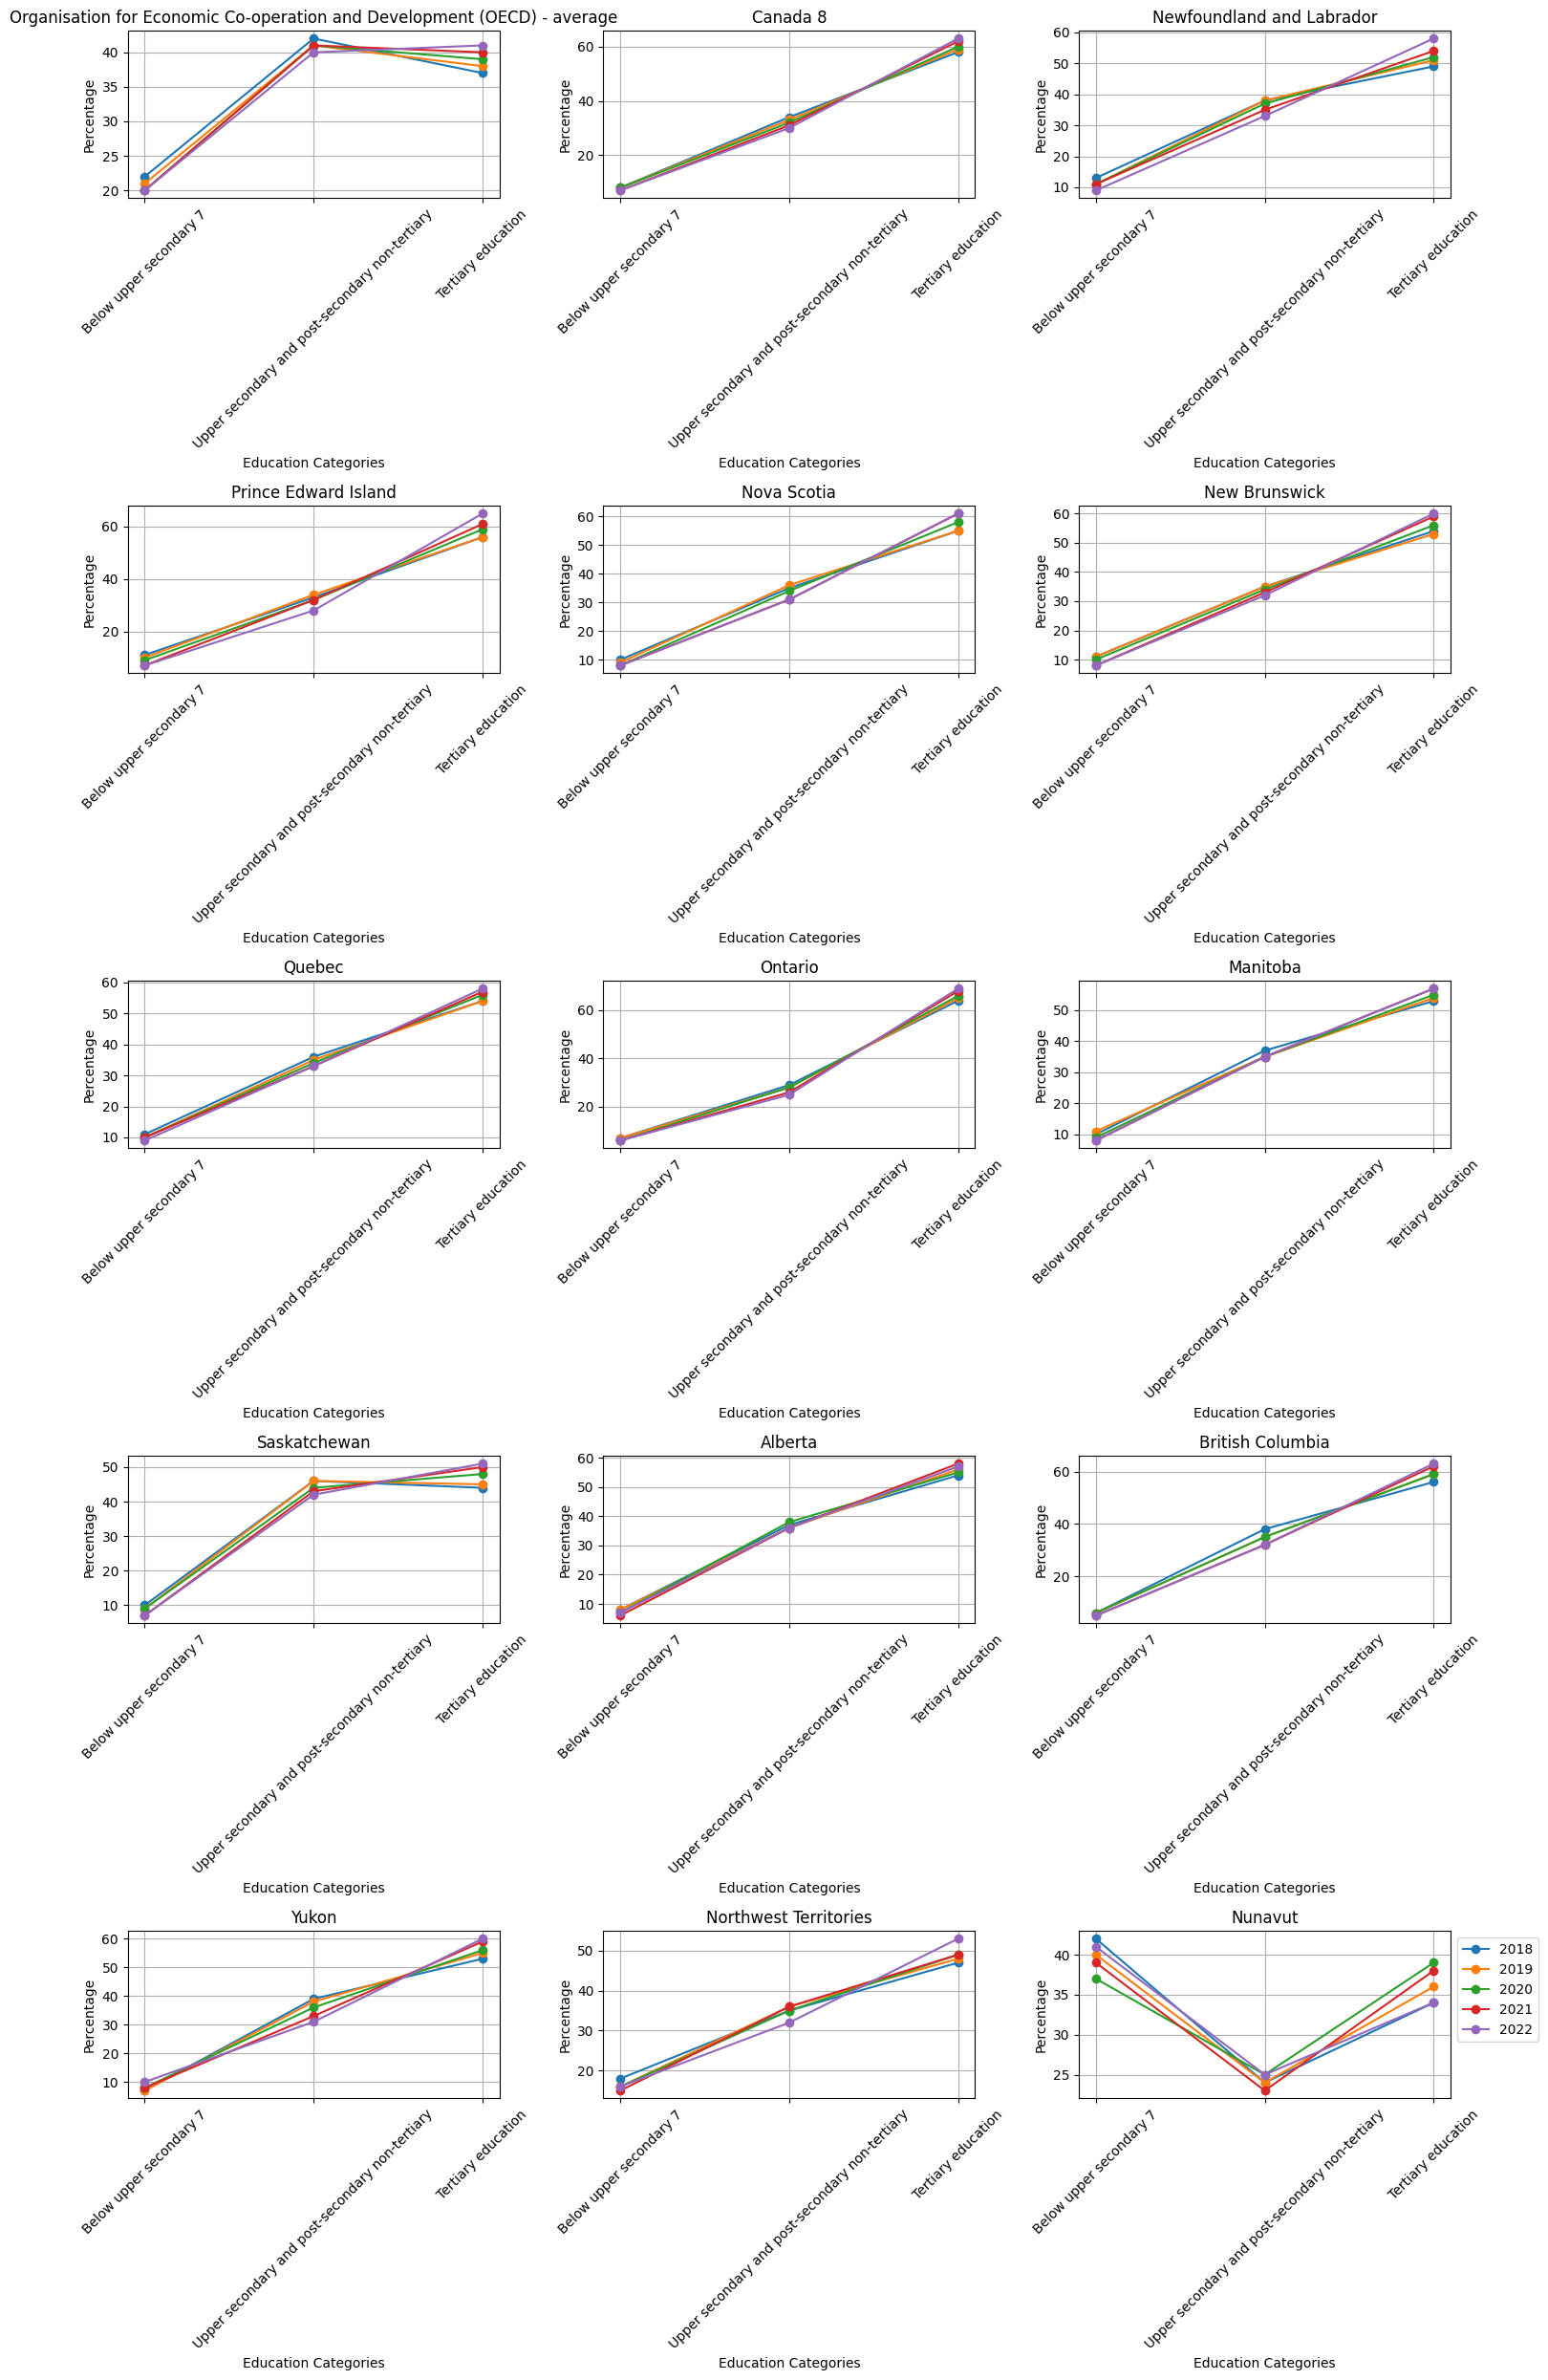

In [50]:
import matplotlib.pyplot as plt

# Determine number of rows and columns for subplots
num_states = len(df['Geography'].unique())
num_cols = 3  # Number of columns for subplots
num_rows = (num_states - 1) // num_cols + 1  # Calculate number of rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axs if it's a 1-dimensional array
if num_rows == 1:
    axs = [axs]

# Initialize a dictionary to store legend handles
handles_dict = {}

# Iterate through states and plot data
for i, state in enumerate(df['Geography'].unique()):
    row = i // num_cols
    col = i % num_cols
    state_data = df[df['Geography'] == state]

    # Extract education categories and years' data
    categories = ['Below upper secondary 7', 'Upper secondary and post-secondary non-tertiary', 'Tertiary education']
    # categories = ['Category 1', 'Category 2', 'Category 3']
    years = ['2018', '2019', '2020', '2021', '2022']

    # Prepare data for plotting
    data = {year: [state_data[state_data['Educational attainment level'] == category][year].values.tolist()[0] if not state_data[state_data['Educational attainment level'] == category][year].empty else None for category in categories] for year in years}

    # Plot graph
    for year in years:
        # Check if all categories have data for this year
        if all(data[year]):
            line, = axs[row][col].plot(categories, data[year], marker='o', label=year)
            handles_dict[year] = line

    axs[row][col].set_title(f'{state}')
    axs[row][col].set_xlabel('Education Categories', fontsize=10)  # Adjust font size
    axs[row][col].set_ylabel('Percentage')
    axs[row][col].grid(True)
    axs[row][col].tick_params(axis='x', rotation=45)

# Adjust layout and display plot
plt.tight_layout()

# Create a common legend outside the subplots
plt.legend(handles=handles_dict.values(), labels=handles_dict.keys(), loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [40]:
def normalGraphs():
  # Filter the data for each state and plot the graphs
  for state in df['Geography'].unique():
      state_data = df[df['Geography'] == state]

      # Extract education categories and years' data
      categories = ['Below upper secondary 7', 'Upper secondary and post-secondary non-tertiary', 'Tertiary education']
      years = ['2018', '2019', '2020', '2021', '2022']

      # Prepare data for plotting
      data = {year: [state_data[state_data['Educational attainment level'] == category][year].values.tolist()[0] if not state_data[state_data['Educational attainment level'] == category][year].empty else None for category in categories] for year in years}

      # Plot graph
      plt.figure(figsize=(10, 6))
      for year in years:
          # Check if all categories have data for this year
          if all(data[year]):
              plt.plot(categories, data[year], marker='o', label=year)
      plt.title(f'Educational Attainment in {state}')
      plt.xlabel('Education Categories')
      plt.ylabel('Percentage')
      plt.legend()
      plt.grid(True)
      plt.xticks(rotation=45)
      plt.tight_layout()
      plt.show()


In [42]:
import plotly.graph_objs as go

def interactiveGraphs():
  # Filter the data for each state and plot the graphs
  for state in df['Geography'].unique():
      state_data = df[df['Geography'] == state]

      # Extract education categories and years' data
      categories = ['Below upper secondary 7', 'Upper secondary and post-secondary non-tertiary', 'Tertiary education']
      years = ['2018', '2019', '2020', '2021', '2022']

      # Prepare data for plotting
      data = {year: [state_data[state_data['Educational attainment level'] == category][year].values.tolist()[0] if not state_data[state_data['Educational attainment level'] == category][year].empty else None for category in categories] for year in years}

      # Create traces for each year
      traces = []
      for year in years:
          # Check if all categories have data for this year
          if all(data[year]):
              trace = go.Scatter(x=categories, y=data[year], mode='lines+markers', name=year)
              traces.append(trace)

      # Create layout
      layout = go.Layout(
          title=f'Educational Attainment in {state}',
          xaxis=dict(title='Education Categories'),
          yaxis=dict(title='Percentage'),
          legend=dict(orientation='h', x=0.1, y=-0.2)
      )

      # Create figure
      fig = go.Figure(data=traces, layout=layout)

      # Show interactive plot
      fig.show()


In [43]:
# Call Functions
# normalGraphs()
interactiveGraphs()

# Correlation Analysis

In [16]:
# Calculate the correlation matrix with numeric_only set to True
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
print(correlation_matrix)

          2018      2019      2020      2021      2022
2018  1.000000  0.997824  0.994767  0.989904  0.983482
2019  0.997824  1.000000  0.997144  0.993557  0.986962
2020  0.994767  0.997144  1.000000  0.997496  0.992622
2021  0.989904  0.993557  0.997496  1.000000  0.996421
2022  0.983482  0.986962  0.992622  0.996421  1.000000


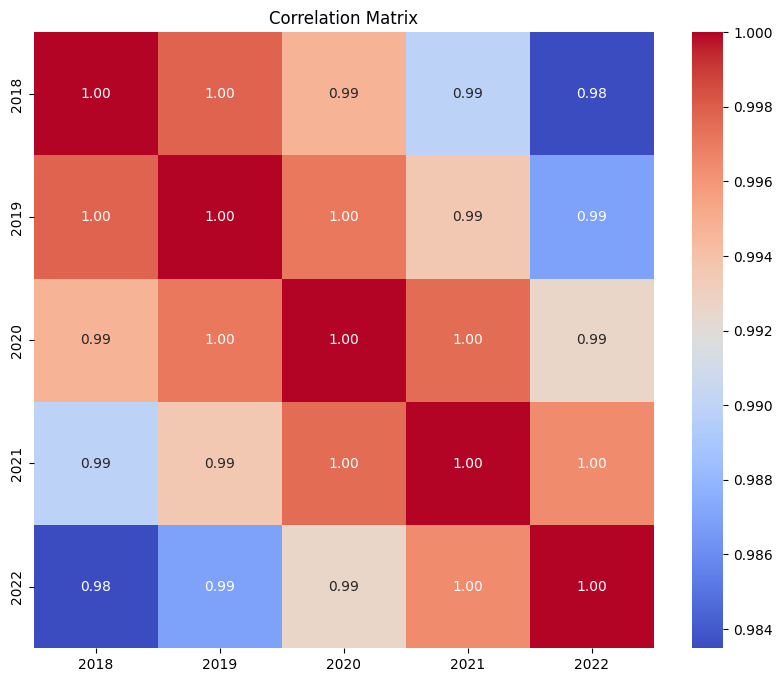

In [18]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis

In [33]:
import plotly.express as px

# Transpose the DataFrame for plotting
df_transposed = df.T.reset_index()

# Melt the DataFrame to have 'Year' and 'Percentage' as columns
df_melted = df_transposed.melt(id_vars=['index'], var_name='Geography', value_name='Percentage')

# Plot the data using Plotly Express
fig = px.line(df_melted, x='index', y='Percentage', color='Geography',
              labels={'index': 'Year', 'Percentage': 'Percentage', 'Geography': 'Geography'},
              title='Educational Attainment Trends Over Time')

# Make the plot interactive
fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(hovermode='x')
fig.show()

# Clustering

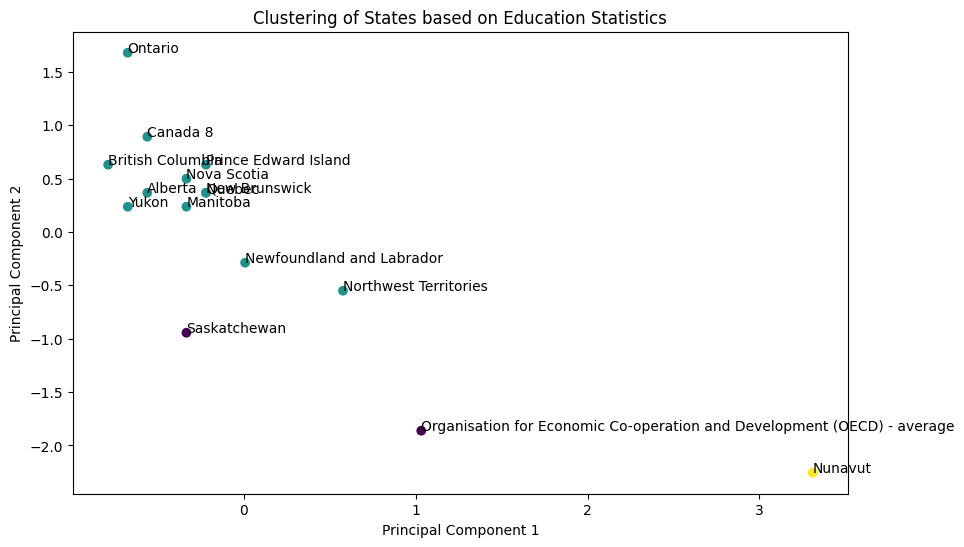

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pivot the data to have states as rows and years as columns
pivot_data = df.pivot(index='Geography', columns='Educational attainment level')

# Drop multi-level index for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]

# Select only the columns containing years (2018, 2019, etc.)
year_columns = [col for col in pivot_data.columns if col.split('_')[0].isdigit()]

# Select data for clustering
X = pivot_data[year_columns]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
pivot_data['Cluster'] = cluster_labels

# Visualize the clusters with state labels
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of States based on Education Statistics')

# Annotate points with state names
for i, state in enumerate(pivot_data.index):
    plt.annotate(state, (X_scaled[i, 0], X_scaled[i, 1]))

plt.show()